# Perceptron

[Source](https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/)

[Source2](https://brilliant.org/wiki/perceptron/)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# Modelo

Idea general del perceptrón:
* Es un algoritmo de aprendizaje supervisado para clasificación.
* Es la suma de las entradas x<sub>i</sub> ponderadas por pesos w<sub>i</sub>.
* Se ocupa una función de activación a la salida de la neurona, en este caso el escalón.

El entrenamiento consiste en:
* A partir de los datos de entrada, el objetivo es calcular los pesos.

Una vez entrenado:
* Clasifica datos nuevos.

![](images/perceptron.png)

Vamos a necesitar:
- Función que deseamos entrenar
- Valores de entrenamiento
- Pesos al azar
- Función de activación
- Hyper Parámetros

## Función a entrenar: OR

| A | B | A or B |
|---|---|--------|
| 0 | 0 | 0      |
| 0 | 1 | 1      |
| 1 | 0 | 1      |
| 1 | 1 | 1      |

## Valores de entrenamiento

In [159]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

[[0, 0], [0, 1], [1, 0], [1, 1]]


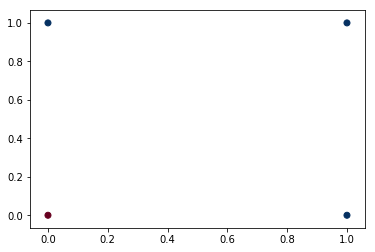

In [180]:
inputs = [i[0] for i in trainingData]
colors = [i[1] for i in trainingData]
print(inputs)
x = [i[0] for i in inputs]
y = [i[1] for i in inputs]
plt.scatter(x, y, c=colors, cmap="bwr")
plt.show()

## Pesos iniciales
Un aspecto de considerar de nuestro problema es que tendremos 3 pesos:
* 2 entradas: $w_1$ de $A$ y $w_2$ de $B$ (`A` y `B` en la tabla) 
* 1 de bías: $w_0$

In [61]:
weights = np.random.rand(2)
bias = random.random()
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 0.12113703  0.64428499]
Bias: 0.5225082353420727


## Funcion de activación

In [34]:
def step(x):
    if x<0:
        return 0
    return 1

In [35]:
print(step(-1))
print(step(-0.1))
print(step(0))
print(step(0.1))
print(step(1))

0
0
1
1
1


## Hyper Parámetros

In [36]:
learningRate = 0.2

# Entrenamiento
El entrenamiento está dado en 4 pasos:
1. Empezar con valores al azar a los pesos $w(0)$ ($w_1$, $w_2$) y al bias $w_0$.
2. Para cada entrada $x_i$, encontrar un arreglo de pesos $w$, tal que $w(t) \cdot x_i + w_0 > 0$. Con $y_i$ la salida para la entrada $x_i$.
3. Actualizar los pesos para la siguiente iteración:
    - $w(t+1) = w(t) + \alpha(d_i - y_i)x_i$
    - $w_0(t+1) = w_0(t) + \alpha(d_i - y_i)$
4. Si el entrenamiento es offline (se entrenan con las mismas entradas), se repiten los pasos 2 y 3 hasta que se reduce el error lo suficiente.

Desde los datos de entrenamiento tenemos:
* $x_i$
* $d_i$

Para cada input, debemos calcular: 
* $y_i$

Con los $y_i$, calculamos los nuevos pesos $w_i$.

## Ejemplo manual

In [136]:
trainingData = [
    #([valores de entrada], salida esperada)
    ([0,0],0),
    ([0,1],0),
    ([1,0],0),
    ([1,1],1),
]

In [137]:
learningRate = 0.5

In [138]:
wi = [0, 0]
w0 = 0
print("wi:", wi)
print("w0:", w0)

wi: [0, 0]
w0: 0


### Epoch 1; Iteración 1
Valor entrenamiento $x_0$

In [139]:
i = 0
xi, di = trainingData[i]
print("xi:", xi, "di", di)

xi: [0, 0] di 0


In [140]:
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)

yi: 0


In [141]:
print("di-yi:", di - yi)

di-yi: 0


In [142]:
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)

new weigth: [ 0.  0.]


In [143]:
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

new bias: 0.0


### Epoch 1; Iteración 2
Valor entrenamiento $x_1$

In [144]:
i = 1
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)
print("di-yi:", di - yi)
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

xi: [0, 1] di 0
yi: 0.0
di-yi: 0.0
new weigth: [ 0.  0.]
new bias: 0.0


### Epoch 1; Iteración 3
Valor entrenamiento $x_2$

In [145]:
i = 2
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)
print("di-yi:", di - yi)
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

xi: [1, 0] di 0
yi: 0.0
di-yi: 0.0
new weigth: [ 0.  0.]
new bias: 0.0


### Epoch 1; Iteración 4
Valor entrenamiento $x_3$

In [146]:
i = 3
xi, di = trainingData[i]
print("xi:", xi, "di", di)
yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
print("yi:", yi)
print("di-yi:", di - yi)
wi = wi + learningRate*(di-yi)*np.array(xi)
print("new weigth:", wi)
w0 = w0 + learningRate*(di-yi)
print("new bias:", w0)

xi: [1, 1] di 1
yi: 0.0
di-yi: 1.0
new weigth: [ 0.5  0.5]
new bias: 0.5


### Epoch 2;
Todos los valores de entrenamiento de nuevo.

In [147]:
for i in range(len(trainingData)):
    xi, di = trainingData[i]
    yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
    wi = wi + learningRate*(di-yi)*np.array(xi)
    w0 = w0 + learningRate*(di-yi)

    print("xi:", xi, "di", di)
    print("yi:", yi)
    print("di-yi:", di - yi)
    print("new weigth:", wi)
    print("new bias:", w0)
    print()

xi: [0, 0] di 0
yi: 0.5
di-yi: -0.5
new weigth: [ 0.5  0.5]
new bias: 0.25

xi: [0, 1] di 0
yi: 0.75
di-yi: -0.75
new weigth: [ 0.5    0.125]
new bias: -0.125

xi: [1, 0] di 0
yi: 0.375
di-yi: -0.375
new weigth: [ 0.3125  0.125 ]
new bias: -0.3125

xi: [1, 1] di 1
yi: 0.125
di-yi: 0.875
new weigth: [ 0.75    0.5625]
new bias: 0.125



### Epoch 3;
Todos los valores de entrenamiento de nuevo. Esta vez, con print solo por la Epoch completa.

In [148]:
for i in range(len(trainingData)):
    xi, di = trainingData[i]
    yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
    wi = wi + learningRate*(di-yi)*np.array(xi)
    w0 = w0 + learningRate*(di-yi)

print("xi:", xi, "di", di)
print("yi:", yi)
print("di-yi:", di - yi)
print("new weigth:", wi)
print("new bias:", w0)
print()

xi: [1, 1] di 1
yi: 0.25
di-yi: 0.75
new weigth: [ 0.875  0.625]
new bias: -0.125



### Cuando detenerse?
Después de varias iteraciones, los pesos convergen a un valor del cual después no se modifican. En este caso, iteraremos hasta llegar a un delta (0.01) entre estos valores.

In [149]:
delta = 0.001
while True:
    old_wi = wi
    old_w0 = w0
    
    for i in range(len(trainingData)):
        xi, di = trainingData[i]
        yi = xi[0]*wi[0] + xi[1]*wi[1] + w0
        wi = wi + learningRate*(di-yi)*np.array(xi)
        w0 = w0 + learningRate*(di-yi)

    print("xi:", xi, "di", di)
    print("yi:", yi)
    print("di-yi:", di - yi)
    print("new weigth:", wi)
    print("new bias:", w0)
    print()
    
    if( (abs(old_wi - wi)  < delta).all() and abs(old_w0 - w0) < delta ):
        print("Sucess")
        break

xi: [1, 1] di 1
yi: 0.34375
di-yi: 0.65625
new weigth: [ 0.9375    0.671875]
new bias: -0.28125

xi: [1, 1] di 1
yi: 0.40625
di-yi: 0.59375
new weigth: [ 0.96875   0.703125]
new bias: -0.375

xi: [1, 1] di 1
yi: 0.4453125
di-yi: 0.5546875
new weigth: [ 0.984375    0.72265625]
new bias: -0.4296875

xi: [1, 1] di 1
yi: 0.46875
di-yi: 0.53125
new weigth: [ 0.9921875  0.734375 ]
new bias: -0.4609375

xi: [1, 1] di 1
yi: 0.482421875
di-yi: 0.517578125
new weigth: [ 0.99609375  0.74121094]
new bias: -0.478515625

xi: [1, 1] di 1
yi: 0.490234375
di-yi: 0.509765625
new weigth: [ 0.99804688  0.74511719]
new bias: -0.48828125

xi: [1, 1] di 1
yi: 0.49462890625
di-yi: 0.50537109375
new weigth: [ 0.99902344  0.74731445]
new bias: -0.49365234375

xi: [1, 1] di 1
yi: 0.4970703125
di-yi: 0.5029296875
new weigth: [ 0.99951172  0.74853516]
new bias: -0.49658203125

xi: [1, 1] di 1
yi: 0.498413085938
di-yi: 0.501586914062
new weigth: [ 0.99975586  0.74920654]
new bias: -0.498168945312

xi: [1, 1] di 1
y

### Lecciones
Algunos puntos importantes que revisamos durante este proceso:
* Los pesos en este caso partieron en cero. Esto implica que siempre que se entrene este sistema con los mismos valores de entrada, se llegará al mismo resultado. Esto puede ser negativo en algunos casos y se recomienda iniciar los pesos con valores random:
    - `wi = random.rand(2)`
    - `w0 = random.random()`.
* Para los 3 primeros valores de entrada, en la primera iteración, no se avanzó en nada. Esto puede pasar, sobre todo con miles de valores de entrada. Para generalizar más la solución, se recomienda tomar al azar los valores desde el set de entrada en cada iteración:
    - `xi, di = random.choice(trainingData)`

## Algoritmo:

In [150]:
trainingData = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]
learningRate = 0.2
wi = np.random.rand(2)
w0 = random.random()
delta = 0.01

In [152]:
while True:
    old_wi = wi
    old_w0 = w0
    
    for i in range(len(trainingData)):
        xi, di = trainingData[i]
        yi = xi[0] * wi[0] + xi[1] * wi[1] + w0
        wi = wi + learningRate*(di-yi)*np.array(xi)
        w0 = w0 + learningRate*(di-yi)

    print("xi:", xi, "; di:", di)
    print("yi:", yi)
    print("di-yi:", di - yi)
    print("new weigth:", wi)
    print("new bias:", w0)
    print()
    
    if( (abs(old_wi - wi)  < delta).all() and abs(old_w0 - w0) < delta ):
        print("Sucess")
        break

xi: [1, 1] ; di: 1
yi: 1.37424576277
di-yi: -0.374245762765
new weigth: [ 0.38099382  0.53330555]
new bias: 0.23539893698

xi: [1, 1] ; di: 1
yi: 1.36397342666
di-yi: -0.363973426656
new weigth: [ 0.38320153  0.51618592]
new bias: 0.246201918726

xi: [1, 1] ; di: 1
yi: 1.35607657485
di-yi: -0.356076574854
new weigth: [ 0.3844795   0.50234112]
new bias: 0.255610013978

xi: [1, 1] ; di: 1
yi: 1.34953630207
di-yi: -0.34953630207
new weigth: [ 0.3850519   0.49106803]
new bias: 0.26369458823

xi: [1, 1] ; di: 1
yi: 1.3440249898
di-yi: -0.344024989799
new weigth: [ 0.38512634  0.48185829]
new bias: 0.270625365933

Sucess
